In [1]:
import matplotlib.pyplot as plt
from tnia.simulation.phantoms import ramp2d, random_circles
from tnia.simulation.test_images import random_circles_on_ramp_background, grid_of_circles_on_ramp_background

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\psfs.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  psf = fftshift(ifftn(ifftshift(otf)).astype(np.float32))
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  return poisson(field_imaged.astype(float))


Text(0.5, 1.0, 'ramp imaged')

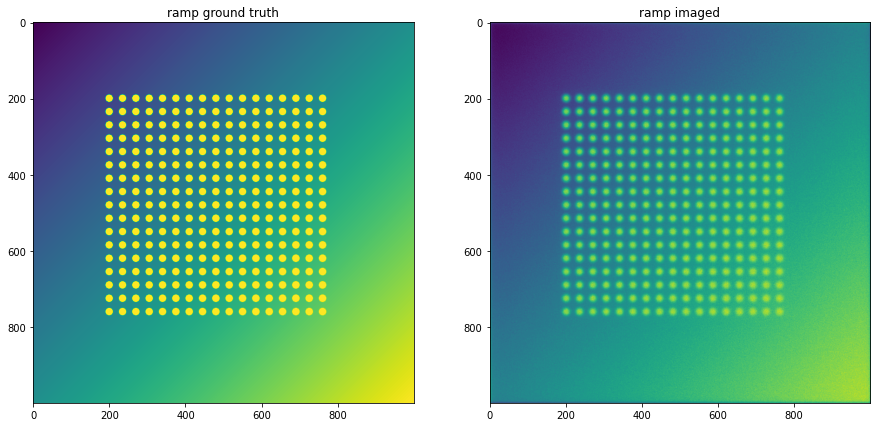

In [2]:
#ramp_truth, ramp = grid_of_circles_on_ramp_background(100,325)
ramp_truth, ramp = grid_of_circles_on_ramp_background(10,35,200)

fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].imshow(ramp_truth)
ax[0].set_title('ramp ground truth')
ax[1].imshow(ramp)
ax[1].set_title('ramp imaged')

Text(0.5, 1.0, 'background subtracted')

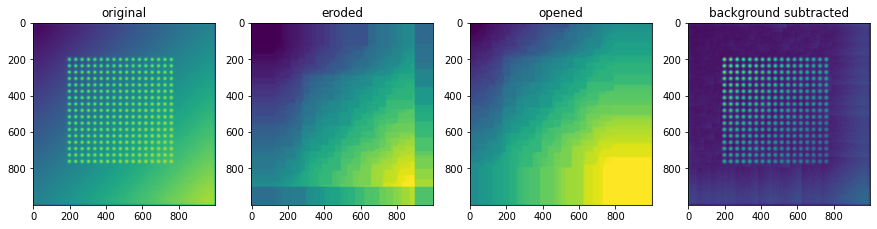

In [3]:
from scipy.ndimage import grey_erosion, grey_dilation

size=200
eroded = grey_erosion(ramp, size)
opened = grey_dilation(eroded, size)

fig, ax = plt.subplots(1,4,figsize=(15,8))
ax[0].imshow(ramp)
ax[0].set_title('original')
ax[1].imshow(eroded)
ax[1].set_title('eroded')
ax[2].imshow(opened)
ax[2].set_title('opened')
ax[3].imshow(ramp-opened)
ax[3].set_title('background subtracted')

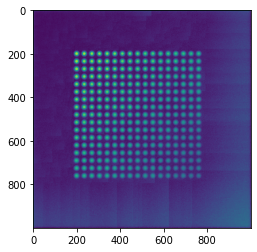

In [4]:
from skimage.morphology import white_tophat, disk, square
ramp_bgs =white_tophat(ramp, square(size))
plt.imshow(ramp_bgs)

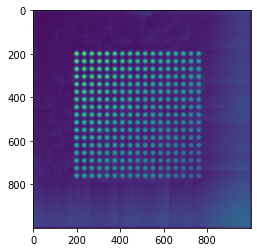

In [5]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

ramp_gpu = cle.push(ramp)
ramp_bgs_clij = cle.top_hat_box(ramp_gpu, radius_x=size/2, radius_y=size/2)
plt.imshow(ramp_bgs_clij)


Text(0.5, 1.0, 'background subtracted')

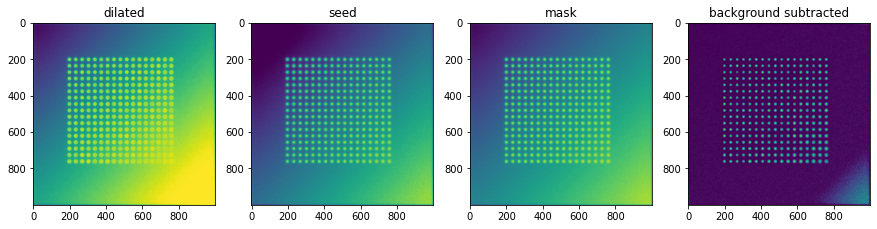

In [6]:
from tnia.background.dilate_subtract import dilate_subtract
ramp_bgs_dilate, dilated, seed, mask = dilate_subtract(ramp, 5)

fig, ax = plt.subplots(1,4,figsize=(15,8))
ax[0].imshow(dilated)
ax[0].set_title('dilated')
ax[1].imshow(seed)
ax[1].set_title('seed')
ax[2].imshow(mask)
ax[2].set_title('mask')
ax[3].imshow(ramp_bgs_dilate)
ax[3].set_title('background subtracted')

Text(0.5, 1.0, 'Otsu on dilate subtract')

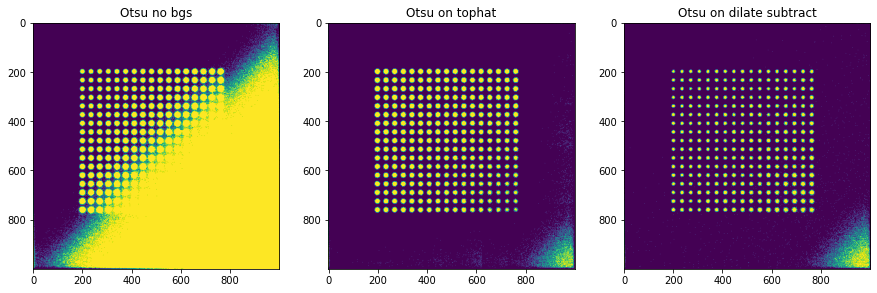

In [7]:
from skimage.filters import threshold_otsu
thresh1 = ramp>threshold_otsu(ramp)
thresh2 = ramp_bgs>threshold_otsu(ramp_bgs)
thresh3 = ramp_bgs_dilate>threshold_otsu(ramp_bgs_dilate)

fig, ax = plt.subplots(1,3,figsize=(15,8))
ax[0].imshow(thresh1)
ax[0].set_title('Otsu no bgs')
ax[1].imshow(thresh2)
ax[1].set_title('Otsu on tophat')
ax[2].imshow(thresh3)
ax[2].set_title('Otsu on dilate subtract')


Text(0.5, 1.0, 'Local on dilate subtract')

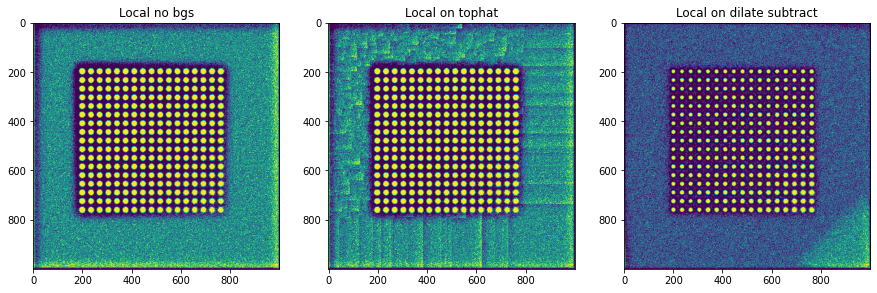

In [8]:
from skimage.filters import threshold_local
thresh1 = ramp>threshold_local(ramp,101)
thresh2 = ramp_bgs>threshold_local(ramp_bgs,101)
thresh3 = ramp_bgs_dilate>threshold_local(ramp_bgs_dilate,101)

fig, ax = plt.subplots(1,3,figsize=(15,8))
ax[0].imshow(thresh1)
ax[0].set_title('Local no bgs')
ax[1].imshow(thresh2)
ax[1].set_title('Local on tophat')
ax[2].imshow(thresh3)
ax[2].set_title('Local on dilate subtract')


Text(0.5, 1.0, 'Local/Global on dilate subtract')

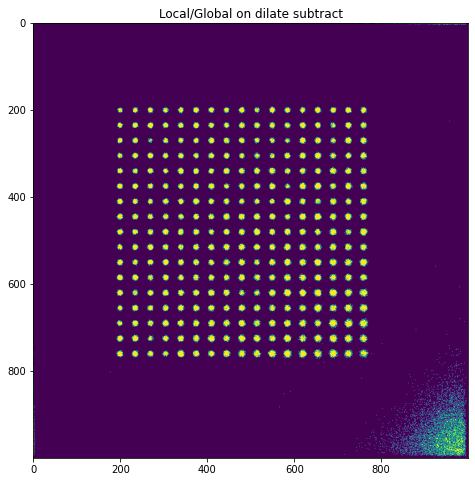

In [9]:
from tnia.segmentation.thresholding import local_global_threshold

thresh = local_global_threshold(ramp_bgs_dilate, 101, 100)

fig, ax = plt.subplots(1,1,figsize=(8,8))
ax.imshow(thresh)
ax.set_title('Local/Global on dilate subtract')

In [298]:
# start napari
import napari
viewer = napari.Viewer()

viewer.add_image(ramp)
viewer.add_image(ramp_bgs)
viewer.add_image(ramp_bgs_dilate)




<Image layer 'ramp_bgs_dilate' at 0x251a3334a60>

Exception in callback BaseAsyncIOLoop._handle_events(6252, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(6252, 1)>
Traceback (most recent call last):
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\tornado\platform\asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 448, in _handle_events
    self._handle_recv()
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 477, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-packages\zmq\eventloop\zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\bnort\anaconda3\envs\tnia_deconware\lib\site-pac